In [27]:
"""
Import libraries
"""

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [28]:
"""
Read data 
"""

df = pd.read_csv(
    'Data_2.csv', 
    index_col = False,
    names = [
        'type',
        'flow_agent_addr',
        'inputPort',
        'outputPort',
        'src_MAC',
        'dst_MAC',
        'eth_type',
        'in_vlan',
        'out_vlan',
        'src_IP',
        'dst_IP',
        'IP_Protocol',
        'ip_tos',
        'ip_ttl',
        'src_port',
        'dst_port',
        'tcp_flags',
        'packet_size',
        'IP_size',
        'sampling_rate'
    ]
)

df.head()

,type,flow_agent_addr,inputPort,outputPort,src_MAC,dst_MAC,eth_type,in_vlan,out_vlan,src_IP,dst_IP,IP_Protocol,ip_tos,ip_ttl,src_port,dst_port,tcp_flags,packet_size,IP_size,sampling_rate
0,FLOW,203.30.38.251,193,130,0031466b23cf,00239cd087c1,0x0800,919.0,919,74.125.10.59,137.132.38.238,17,0x00,63,443.0,62758,0x00,1396,1378,2048
1,FLOW,203.30.38.251,193,130,0031466b23cf,00239cd087c1,0x0800,919.0,919,173.194.22.215,137.132.228.29,6,0x00,63,443.0,39740,0x10,1438,1420,2048
2,FLOW,203.30.38.251,199,131,544b8cf9a7df,001cb0c88e40,0x0800,600.0,43,193.62.193.9,202.130.56.153,6,0x00,246,80.0,35794,0x18,272,250,2048
3,FLOW,203.30.38.251,193,131,0031466b23cf,001cb0c88e40,0x0800,919.0,43,74.125.130.132,192.122.131.33,6,0x00,52,443.0,5287,0x10,1418,1400,2048
4,FLOW,203.30.38.251,129,193,00135f21bc80,0031466b23cf,0x0800,11.0,919,155.69.160.69,74.125.68.139,17,0x60,59,48361.0,443,0x00,89,67,2048


In [29]:
"""
Basic Information:
Top 5 Talkers. (ie sender nodes)
Top 5 Listeners (ie receiving node)
Top 5 applications
Total estimated traffic
Proportion of TCP and UDP packets
"""

top_5_talkers = df['src_IP'].value_counts()[:5]
top_5_listeners = df['dst_IP'].value_counts()[:5]
top_5_applications = df['dst_port'].value_counts()[:5]
total_estimated_traffic = df['IP_size'].sum()

tcp_count = df['IP_Protocol'].value_counts().get(6)
udp_count = df['IP_Protocol'].value_counts().get(17)
total_count = df['IP_Protocol'].value_counts().sum()
tcp_proportion = tcp_count / total_count
udp_proportion = udp_count / total_count

'''
Print out some statistics
'''
print('Value Counts for IP Protocols:\n{}\n'.format(df['IP_Protocol'].value_counts()))


'''
Answers:
'''

print('Top 5 talkers (IP):\n{}\n'.format(top_5_talkers))
print('Top 5 listeners (IP):\n{}\n'.format(top_5_listeners))
print('Top 5 applications:\n{}\n'.format(top_5_applications))
print('Total estimated traffic:\n{} bytes\n'.format(total_estimated_traffic))
print('Proportion of TCP and UDP packets:\nTCP Proportion: {}\nUDP Proportion: {}\n'.format(tcp_proportion, udp_proportion))

Value Counts for IP Protocols:
6     137707
17     36852
0       1216
50       718
47       664
1         60
58        10
41         3
2          2
Name: IP_Protocol, dtype: int64

Top 5 talkers (IP):
13.107.4.50       5960
130.14.250.7      4034
155.69.160.38     3866
171.67.77.19      2656
155.69.199.255    2587
Name: src_IP, dtype: int64

Top 5 listeners (IP):
137.132.228.33    5908
192.122.131.36    4662
202.51.247.133    4288
137.132.228.29    4022
103.37.198.100    3741
Name: dst_IP, dtype: int64

Top 5 applications:
443      43208
80       11018
50930     2450
15000     2103
8160      1354
Name: dst_port, dtype: int64

Total estimated traffic:
169934750 bytes

Proportion of TCP and UDP packets:
TCP Proportion: 0.7769872257831543
UDP Proportion: 0.20793084770244652



In [9]:
"""
Additional Information:
Top 5 communication pair.
Visualizing the communication between different IP hosts. 
Any other stuff.
"""

'''
Top 5 communication pair


Example:
src | dest
----|-----
a   | b
----|-----
c   | d
----|-----
b   | a
'''

communication_pair = {}

for index, data_point in df.iterrows():
    communication_pair_1 = data_point['src_IP'] + '/' + data_point['dst_IP'] # word1 a/b, {}|| word1 c/d      || word1 b/a
    communication_pair_2 = data_point['dst_IP'] + '/' + data_point['src_IP'] # word2 b/a, {}|| word2 d/c      || word2 a/b
    if communication_pair_1 in communication_pair.keys():                    # {a/b:1}      || {a/b:1, c/d:1} || {a/b:2, c/d:1}
        communication_pair[communication_pair_1] += 1
    elif communication_pair_2 in communication_pair.keys():
        communication_pair[communication_pair_2] += 1
    else:
        communication_pair[communication_pair_1]=1                 

communication_pair_sorted = sorted([(k,v) for k,v in communication_pair.items()], key= lambda x: x[1], reverse=True)
top_5_communication_pair_sorted = communication_pair_sorted[:5]
print('Top 5 communication pairs:\n')
print('----------------------------------------------------------')
for index, value in enumerate(top_5_communication_pair_sorted):
    print('| Pair {index} - {pair} | Traffic - {traffic} |'.format(index = index + 1, pair = value[0], traffic = value[1]))
    print('----------------------------------------------------------')

Top 5 communication pairs:

----------------------------------------------------------
| Pair 1 - 130.14.250.7/103.37.198.100 | Traffic - 4201 |
----------------------------------------------------------
| Pair 2 - 192.122.131.36/171.67.77.19 | Traffic - 3628 |
----------------------------------------------------------
| Pair 3 - 129.99.230.54/137.132.22.74 | Traffic - 2417 |
----------------------------------------------------------
| Pair 4 - 137.131.17.212/137.132.228.42 | Traffic - 2370 |
----------------------------------------------------------
| Pair 5 - 104.146.199.27/202.21.159.246 | Traffic - 1794 |
----------------------------------------------------------


Max traffic: 1833.855 MB
Mean traffic: 1699.348 MB
Median traffic: 1699.296 MB


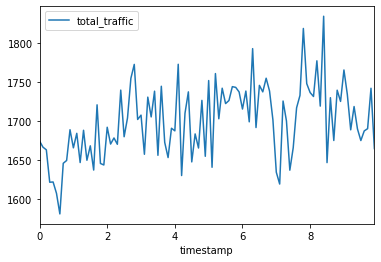

In [60]:
"""
Measuring the average traffic per 100 millisecond (0.1 seconds) to determine peak network traffic

Assumption 1: Estimated total traffic over a monitored period of 10 seconds
Assumption 2: Packet transmission is spread and distributed equally over the 10 seconds
Assumption 3: Assume the dataset is a time-series dataset
"""

import matplotlib.pyplot as plt
import numpy as np

df.index.names = ['id']
df_average_traffic_per_100_ms = pd.DataFrame(columns = ['timestamp', 'total_traffic'])
split_df_into_100_segments = np.array_split(df, 100)

for i in range(len(split_df_into_100_segments)):
    indexed_split_df_into_100_segments = split_df_into_100_segments[i]
    total_traffic_of_indexed_split_df_into_100_segments = indexed_split_df_into_100_segments['IP_size'].sum() * 1000 * 10**(-6)
    df_average_traffic_per_100_ms.loc[len(df_average_traffic_per_100_ms)] = [i/10, total_traffic_of_indexed_split_df_into_100_segments]

df_average_traffic_per_100_ms_max_traffic = round(df_average_traffic_per_100_ms['total_traffic'].max(), 3)
print("Max traffic: {} MB".format(df_average_traffic_per_100_ms_max_traffic))

df_average_traffic_per_100_ms_mean_traffic = round(df_average_traffic_per_100_ms['total_traffic'].mean(), 3)
print("Mean traffic: {} MB".format(df_average_traffic_per_100_ms_mean_traffic))

df_average_traffic_per_100_ms_median_traffic = round(df_average_traffic_per_100_ms['total_traffic'].median(), 3)
print("Median traffic: {} MB".format(df_average_traffic_per_100_ms_median_traffic))

ax = plt.gca()
df_average_traffic_per_100_ms.plot(kind = 'line', x = 'timestamp', y = 'total_traffic', ax = ax)
plt.show()

Max traffic: 17314.935 MB
Mean traffic: 16993.475 MB
Median traffic: 17026.601 MB


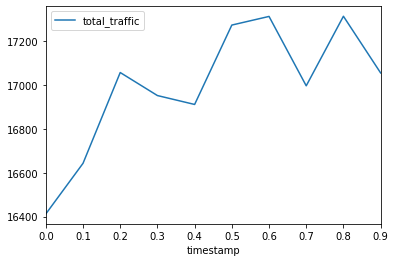

In [61]:
"""
Measuring the average traffic per second

Assumption 1: Estimated total traffic over a monitored period of 10 seconds
Assumption 2: Packet transmission is spread and distributed equally over the 10 seconds
Assumption 3: Assume the dataset is a time-series dataset
"""

import matplotlib.pyplot as plt
import numpy as np

df.index.names = ['id']
df_average_traffic_second = pd.DataFrame(columns = ['timestamp', 'total_traffic'])
split_df_into_10_segments = np.array_split(df, 10)

for i in range(len(split_df_into_10_segments)):
    indexed_split_df_into_10_segments = split_df_into_10_segments[i]
    total_traffic_of_indexed_split_df_into_10_segments = indexed_split_df_into_10_segments['IP_size'].sum() * 1000 * 10**(-6)
    df_average_traffic_second.loc[len(df_average_traffic_second)] = [i/10, total_traffic_of_indexed_split_df_into_10_segments]

df_average_traffic_second_max_traffic = round(df_average_traffic_second['total_traffic'].max(), 3)
print("Max traffic: {} MB".format(df_average_traffic_second_max_traffic))

df_average_traffic_second_mean_traffic = round(df_average_traffic_second['total_traffic'].mean(), 3)
print("Mean traffic: {} MB".format(df_average_traffic_second_mean_traffic))

df_average_traffic_second_median_traffic = round(df_average_traffic_second['total_traffic'].median(), 3)
print("Median traffic: {} MB".format(df_average_traffic_second_median_traffic))

ax = plt.gca()
df_average_traffic_second.plot(kind = 'line', x = 'timestamp', y = 'total_traffic', ax = ax)
plt.show()

Network visualised in Bar Chart:



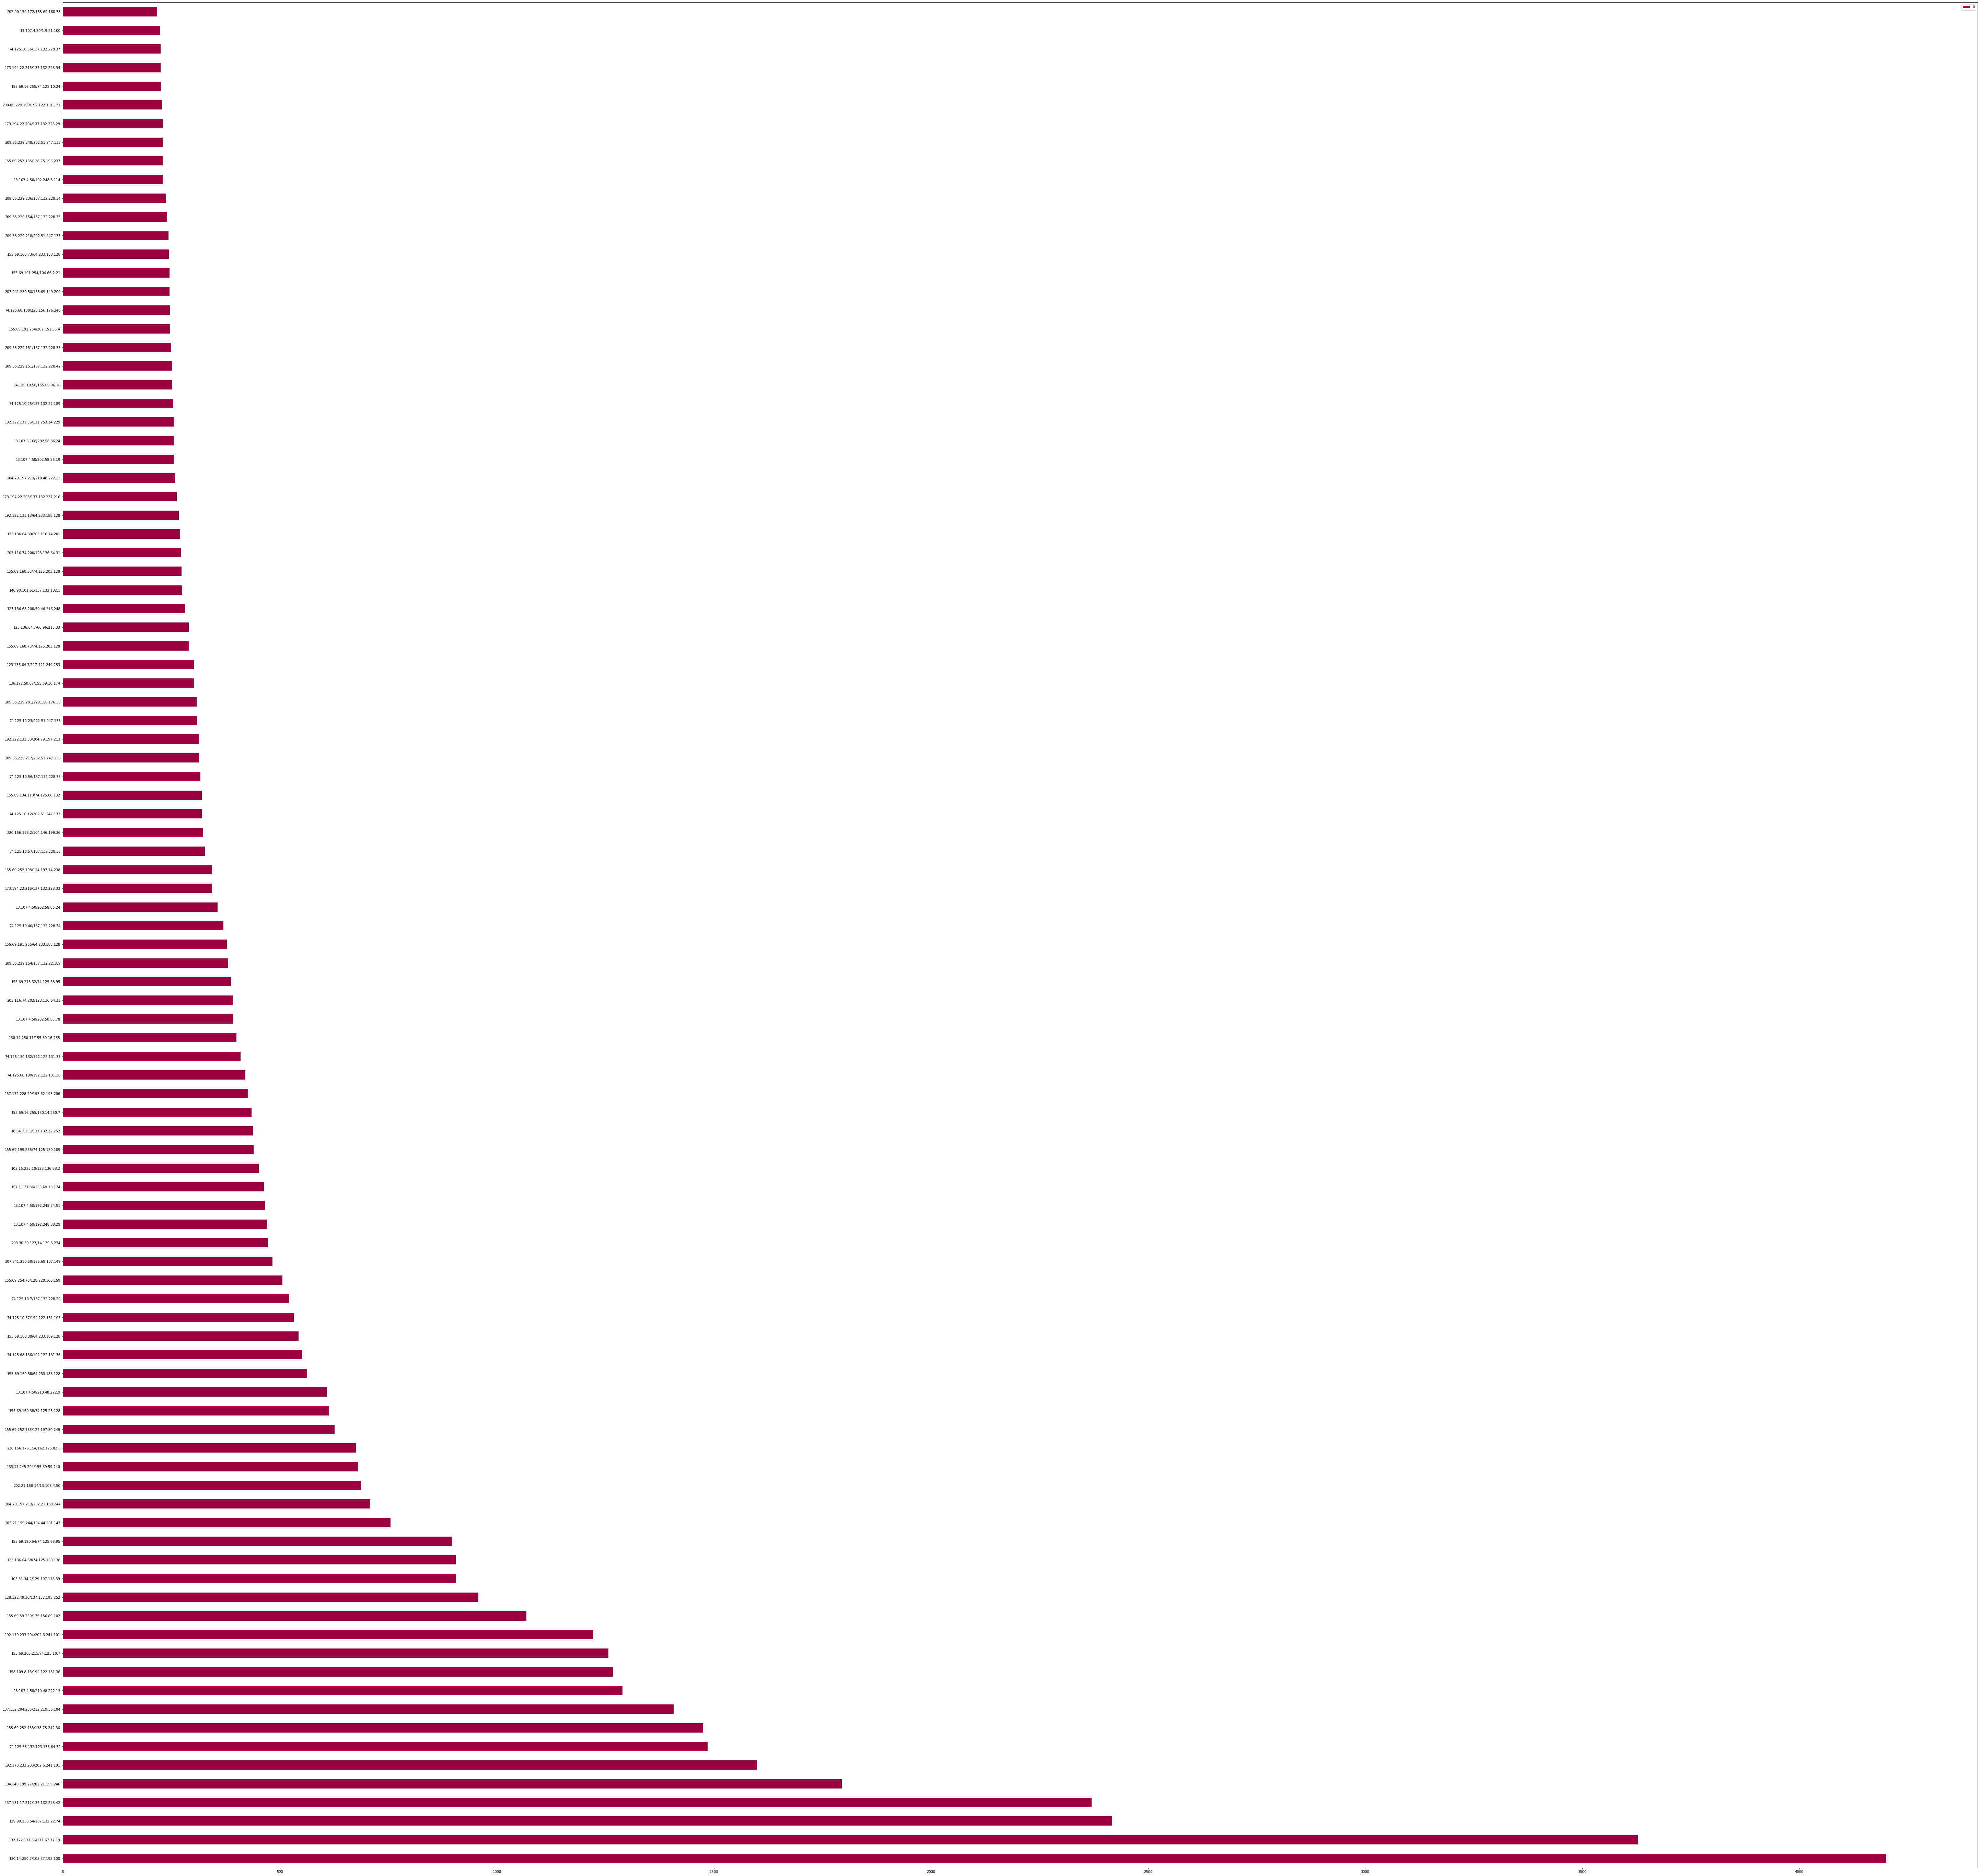

In [88]:
'''
Visualizing the communication between different IP hosts 1 (Bar Chart)
'''

print('Network visualised in Bar Chart:\n')
pd.DataFrame(list(list(zip(*communication_pair_sorted))[1][0:100]), list(list(zip(*communication_pair_sorted))[0][0:100])).plot.barh(figsize=(100,100), colormap='Spectral');

Network visualised using Graph Visualisations v1:



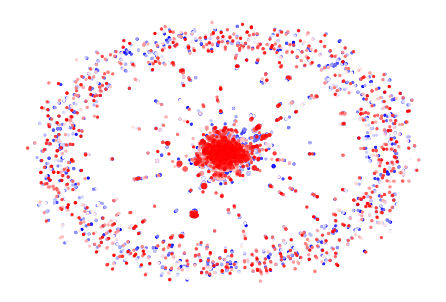

In [92]:
'''
Visualizing the communication between different IP hosts 2 (Graph Network)
'''

graph = nx.Graph()
node_size = []
nodes = list(set(df['src_IP'].tolist() + df['dst_IP'].tolist()))
graph.add_nodes_from(nodes)

for p, n in communication_pair_sorted:
    graph.add_edge(p.split('/')[0], p.split('/')[1], weight = n)
    
for node in nodes:
    if graph.degree(node, weight='weight') < 25:
        node_size.append(5)
    elif graph.degree(node, weight='weight') < 50:
        node_size.append(10)
    elif graph.degree(node, weight='weight') < 75:
        node_size.append(15)
    elif graph.degree(node, weight='weight') < 100:
        node_size.append(20)
    elif graph.degree(node, weight='weight') < 125:
        node_size.append(25)
    else:
        node_size.append(30)
        
edges = graph.edges()
weights = [graph[u][v]['weight']/500 for u, v in edges]
print('Network visualised using Graph Visualisations v1:\n')
nx.draw_spring(graph, node_size = node_size, node_color = range(len(nodes)), width = weights, cmap = plt.cm.bwr)

In [93]:
communication_pair_sorted

[('130.14.250.7/103.37.198.100', 4201),
 ('192.122.131.36/171.67.77.19', 3628),
 ('129.99.230.54/137.132.22.74', 2417),
 ('137.131.17.212/137.132.228.42', 2370),
 ('104.146.199.27/202.21.159.246', 1794),
 ('192.170.233.203/202.6.241.101', 1599),
 ('74.125.68.132/123.136.64.32', 1485),
 ('155.69.252.133/138.75.242.36', 1475),
 ('137.132.204.235/212.219.56.184', 1407),
 ('13.107.4.50/210.48.222.13', 1289),
 ('158.109.8.13/192.122.131.36', 1267),
 ('155.69.203.215/74.125.10.7', 1257),
 ('192.170.233.204/202.6.241.101', 1222),
 ('155.69.59.250/175.156.89.102', 1068),
 ('128.122.49.30/137.132.195.252', 957),
 ('103.31.34.2/129.107.118.39', 906),
 ('123.136.64.58/74.125.130.138', 905),
 ('155.69.120.64/74.125.68.95', 897),
 ('202.21.159.244/104.44.201.147', 755),
 ('204.79.197.213/202.21.159.244', 708),
 ('202.21.158.14/13.107.4.50', 687),
 ('133.11.245.204/155.69.59.240', 680),
 ('220.156.176.154/162.125.82.6', 675),
 ('155.69.252.133/124.197.80.249', 626),
 ('155.69.160.38/74.125.23.128', 